## Getting the necessary libraries and inserting the data into a dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from scipy.stats import zscore

In [2]:
data = pd.read_csv("data.csv")

## An initial view at the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

### See the first and last instances of the dataframe

In [4]:
data.head(5)

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN


In [5]:
data.tail(5)

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
38467,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-02-24,1804.0,35960.0,1456.0
38468,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-02-25,2965.0,35994.0,1458.0
38469,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.0
38470,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.0
38471,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-02-28,NaN,36089.0,1463.0


In [6]:
data.describe()

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,3.847200e+04,38472.000000,38472.000000,3.057700e+04,3.821800e+04,34862.000000
mean,23.737060,20.210847,17.717145,3.165305,2.086313,19002.331415,4.896983e+07,32.751508,10.663392,3.944059e+04,2.879027e+05,8090.504733
std,26.060413,61.074922,8.134926,2.561767,1.518252,22271.107786,1.427251e+08,8.472305,6.770417,1.501847e+05,1.405243e+06,29548.753221
min,-40.900000,-106.350000,-2.000000,0.200000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,-2.391720e+05,1.000000e+00,1.000000
25%,8.620000,-3.440000,11.000000,1.400000,0.820000,3659.000000,4.793900e+06,27.000000,5.000000,1.505000e+03,2.074000e+03,77.000000
50%,27.510000,21.820000,20.000000,2.500000,1.890000,8821.800000,1.148464e+07,32.000000,8.000000,5.520000e+03,2.143100e+04,527.000000
75%,45.940000,47.480000,25.000000,4.490000,3.210000,25946.200000,4.286296e+07,41.000000,16.000000,2.038200e+04,1.373770e+05,3480.500000
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2.945871e+06,2.860567e+07,513091.000000


# Data preparation

## Fill the empty values

In [7]:
#We full every lacking value at Daily tests,Cases and Deaths we the value 0.
#We don't delete any row in order not to lose any data, as every row is important to have in order to locate
#the daily progress of the disease.
data=data.fillna(0)
                    

## Change the dataframes to be easier to handle

We have noticed that for every country, most columns has the same information, so we chose to 

In [8]:


countries_stats= data.drop_duplicates(ignore_index=True, subset=['Entity', 'Average temperature per year', 'Hospital beds per 1000 people',
       'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
       'Median age', 'Population aged 65 and over (%)'])

countries_stats=countries_stats.drop(['Date', 'Daily tests','Cases', 'Deaths'],axis=1)
countries_stats=countries_stats.rename(columns={"Entity":"Country"})



In [9]:
data_days_stats={}
for country in countries_stats['Country']:
    single_country=data.loc[data['Entity']==country]
    single_country=single_country[['Date','Daily tests','Cases','Deaths']]
    single_country=single_country.set_index("Date")
    data_days_stats[country]=  single_country

In [10]:
data_days_stats['Albania'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 2020-02-25 to 2021-02-28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Daily tests  370 non-null    float64
 1   Cases        370 non-null    float64
 2   Deaths       370 non-null    float64
dtypes: float64(3)
memory usage: 11.6+ KB


In [11]:
for country in data_days_stats.values():
    country["Daily cases"]=country['Cases'].diff(1)
    country["Daily deaths"]=country['Deaths'].diff(1)
   

In [12]:
for country,dataframes in data_days_stats.items():    
    data_days_stats[country]=dataframes.fillna(0)
    print(country,data_days_stats[country].describe())

Albania        Daily tests          Cases       Deaths  Daily cases  Daily deaths
count   370.000000     370.000000   370.000000   370.000000    370.000000
mean   1170.264865   22774.275676   464.572973   289.640541      4.854054
std    1197.952531   29178.287865   514.300347   334.345971      5.134537
min       0.000000       0.000000     0.000000     0.000000      0.000000
25%     252.000000    1056.500000    33.000000    23.000000      1.000000
50%     808.500000    9139.000000   268.500000   132.500000      3.500000
75%    1903.250000   36653.750000   783.000000   536.500000      7.000000
max    4562.000000  107167.000000  1796.000000  1239.000000     21.000000
Algeria        Daily tests          Cases       Deaths  Daily cases  Daily deaths
count   370.000000     370.000000   370.000000   370.000000    370.000000
mean      8.378378   45655.018919  1480.656757   305.651351      8.062162
std     131.944258   38532.818754   966.709564   245.125276      5.072795
min       0.000000    

Chile         Daily tests          Cases        Deaths   Daily cases  Daily deaths
count    372.000000     372.000000    372.000000    372.000000    372.000000
mean   24556.370968  362536.139785   9388.758065   2216.728495     55.301075
std    16806.026050  250194.240517   6889.684503   1747.399966     76.879790
min        0.000000       2.000000      0.000000      0.000000      0.000000
25%    12624.500000   91864.000000    794.750000   1240.000000     13.750000
50%    22724.500000  403233.500000  11031.000000   1783.500000     44.000000
75%    36680.500000  547667.500000  15289.000000   3239.250000     75.000000
max    68458.000000  824625.000000  20572.000000  13990.000000   1057.000000
Colombia         Daily tests         Cases        Deaths   Daily cases  Daily deaths
count    360.000000  3.600000e+02    360.000000    360.000000    360.000000
mean   30386.211111  7.640927e+05  21375.377778   6254.691667    166.016667
std    22960.722147  7.424331e+05  19451.633124   4721.337875   

Iceland        Daily tests        Cases      Deaths  Daily cases  Daily deaths
count   368.000000   368.000000  368.000000   368.000000    368.000000
mean    752.785326  3153.209239   14.611413    16.437500      0.078804
std     684.140962  1935.527272    9.388588    24.573782      0.399982
min       0.000000     0.000000    0.000000    -1.000000      0.000000
25%     265.750000  1805.000000   10.000000     0.000000      0.000000
50%     595.000000  2096.000000   10.000000     6.000000      0.000000
75%    1024.250000  5373.500000   26.000000    18.000000      0.000000
max    4525.000000  6049.000000   29.000000   106.000000      5.000000
India         Daily tests         Cases         Deaths   Daily cases  Daily deaths
count  3.960000e+02  3.960000e+02     396.000000    396.000000    396.000000
mean   5.167780e+05  4.336246e+06   66281.954545  28061.212121    396.861111
std    4.585104e+05  4.363714e+06   62046.597351  27958.740981    375.021374
min    0.000000e+00  1.000000e+00      

Malaysia          Daily tests          Cases       Deaths  Daily cases  Daily deaths
count     401.000000     401.000000   401.000000   401.000000    401.000000
mean    14792.022444   46334.466334   237.231920   749.997506      2.817955
std     17464.664388   74942.105401   262.424672  1176.225288      4.464782
min         0.000000       3.000000     0.000000     0.000000      0.000000
25%      3946.000000    6353.000000   105.000000    12.000000      0.000000
50%      8912.000000    9114.000000   125.000000    88.000000      1.000000
75%     19149.000000   52638.000000   329.000000  1109.000000      4.000000
max    126964.000000  300752.000000  1130.000000  5728.000000     25.000000
Malta        Daily tests         Cases      Deaths  Daily cases  Daily deaths
count   370.000000    370.000000  370.000000   370.000000    370.000000
mean   1859.264865   5285.678378   73.645946    60.762162      0.851351
std    1071.161108   6425.580576   98.829691    65.992877      1.301265
min       0.0

Philippines         Daily tests          Cases       Deaths  Daily cases  Daily deaths
count    396.000000     396.000000    396.00000   396.000000    396.000000
mean   20611.310606  213144.606061   4238.40404  1455.431818     31.106061
std    14557.603324  205062.551942   3980.93321  1286.457297     36.115551
min        0.000000       1.000000      0.00000     0.000000     -2.000000
25%     5190.250000   10433.000000    693.25000   267.000000      7.000000
50%    24450.500000  155789.000000   2521.00000  1380.500000     18.000000
75%    34601.250000  417343.500000   8090.75000  2073.000000     48.250000
max    44825.000000  576352.000000  12318.00000  6725.000000    259.000000
Poland          Daily tests         Cases        Deaths   Daily cases  Daily deaths
count     362.000000  3.620000e+02    362.000000    362.000000    362.000000
mean    25163.944751  4.378753e+05   9900.889503   4715.428177    120.908840
std     27947.172026  5.866126e+05  13656.079651   6694.220142    174.02340

Turkey          Daily tests         Cases        Deaths    Daily cases  Daily deaths
count     355.000000  3.550000e+02    355.000000     355.000000    355.000000
mean    92312.630986  7.231081e+05  10050.822535    7610.104225     80.476056
std     59076.230126  9.036802e+05   8209.811475   44108.422607     66.913439
min         0.000000  1.000000e+00      0.000000       0.000000      0.000000
25%     40508.000000  1.706265e+05   4701.500000    1212.000000     22.000000
50%     99497.000000  2.765550e+05   6564.000000    1761.000000     66.000000
75%    142220.000000  6.849185e+05  14032.500000    6491.000000    111.000000
max    208873.000000  2.701588e+06  28569.000000  823225.000000    259.000000
Uganda        Daily tests         Cases      Deaths  Daily cases  Daily deaths
count   345.000000    345.000000  345.000000   345.000000    345.000000
mean   1578.747826  12377.742029  102.623188   116.973913      0.968116
std    1700.118858  14792.293745  120.743638   177.190057      2.182

In [13]:
for country,dataframes in data_days_stats.items():    

    print(country,data_days_stats[country].median())

Albania Daily tests      808.5
Cases           9139.0
Deaths           268.5
Daily cases      132.5
Daily deaths       3.5
dtype: float64
Algeria Daily tests         0.0
Cases           43209.5
Deaths           1479.0
Daily cases       237.5
Daily deaths        8.0
dtype: float64
Argentina Daily tests      12476.5
Cases           257389.5
Deaths            4884.0
Daily cases       4857.0
Daily deaths        84.5
dtype: float64
Armenia Daily tests         0.0
Cases           43750.0
Deaths            877.0
Daily cases       265.0
Daily deaths        6.0
dtype: float64
Australia Daily tests     15753.5
Cases           22550.0
Deaths            368.0
Daily cases        15.0
Daily deaths        0.0
dtype: float64
Austria Daily tests     10499.0
Cases           26475.5
Deaths            733.0
Daily cases       410.5
Daily deaths        5.5
dtype: float64
Bahrain Daily tests      8417.0
Cases           50756.0
Deaths            188.0
Daily cases       322.0
Daily deaths        1.0
dtype: flo

Thailand Daily tests     4480.0
Cases           3317.0
Deaths            58.0
Daily cases        5.0
Daily deaths       0.0
dtype: float64
Togo Daily tests      616.0
Cases           1408.0
Deaths            28.0
Daily cases       13.0
Daily deaths       0.0
dtype: float64
Trinidad and Tobago Daily tests       74.5
Cases           2240.0
Deaths            33.5
Daily cases        7.0
Daily deaths       0.0
dtype: float64
Tunisia Daily tests       70.0
Cases           3883.0
Deaths            78.5
Daily cases       42.0
Daily deaths       1.0
dtype: float64
Turkey Daily tests      99497.0
Cases           276555.0
Deaths            6564.0
Daily cases       1761.0
Daily deaths        66.0
dtype: float64
Uganda Daily tests     1603.0
Cases           4101.0
Deaths            46.0
Daily cases       39.0
Daily deaths       0.0
dtype: float64
Ukraine Daily tests       9119.0
Cases           124132.0
Deaths            2605.0
Daily cases       2253.0
Daily deaths        35.0
dtype: float64
United

[Text(0.5, 1.0, 'Peru')]

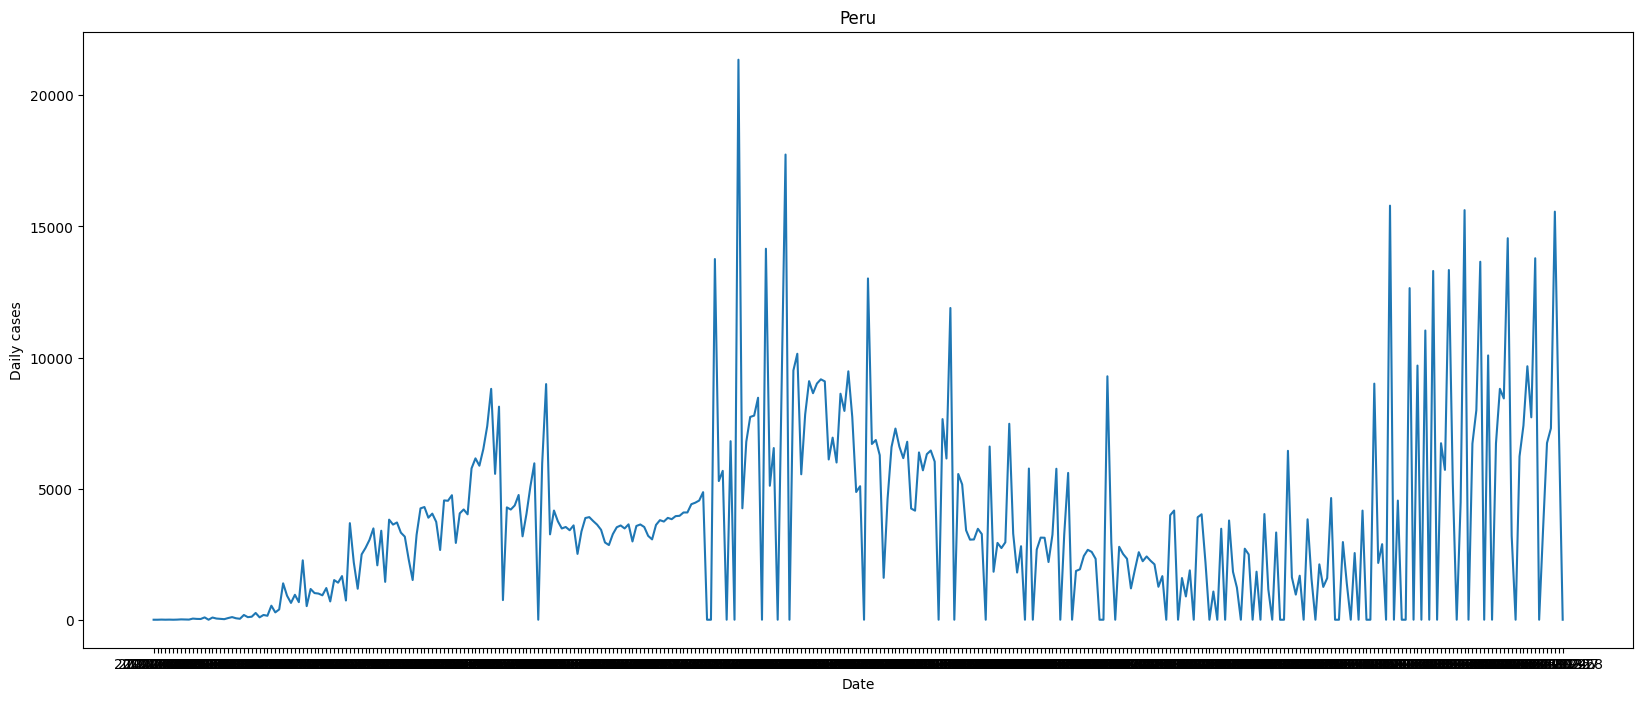

In [14]:
fig, axes = plt.subplots(figsize=(20, 8) )
country,dataframes = rnd.choice(list(data_days_stats.items()))
sns.lineplot(data=dataframes,x=dataframes.index,y='Daily cases').set(title=country)
 

In [15]:
print(data_days_stats['Malta'].head(20))
print(data_days_stats['Malta'].tail(20))

            Daily tests  Cases  Deaths  Daily cases  Daily deaths
Date                                                             
2020-02-25         29.0    0.0     0.0          0.0           0.0
2020-02-26         50.0    0.0     0.0          0.0           0.0
2020-02-27         14.0    0.0     0.0          0.0           0.0
2020-02-28         10.0    0.0     0.0          0.0           0.0
2020-02-29          7.0    0.0     0.0          0.0           0.0
2020-03-01          8.0    0.0     0.0          0.0           0.0
2020-03-02          5.0    0.0     0.0          0.0           0.0
2020-03-03         22.0    0.0     0.0          0.0           0.0
2020-03-04         42.0    0.0     0.0          0.0           0.0
2020-03-05         31.0    0.0     0.0          0.0           0.0
2020-03-06         63.0    0.0     0.0          0.0           0.0
2020-03-07         98.0    3.0     0.0          3.0           0.0
2020-03-08        118.0    3.0     0.0          0.0           0.0
2020-03-09

In [16]:
mean_daily_tests=[]
mean_daily_cases=[]
mean_daily_deaths=[]
for dataframes in data_days_stats.values():
    mean_daily_tests.append(dataframes["Daily tests"].mean())
    mean_daily_cases.append(dataframes['Daily cases'].loc[dataframes["Cases"]>10].mean())
    mean_daily_deaths.append(dataframes['Daily deaths'].loc[dataframes["Cases"]>10].mean())                                                         

In [17]:
countries_stats['Mean daily tests']=mean_daily_tests
#countries_stats['Mean daily cases']=mean_daily_cases
#countries_stats['Mean daily deaths']=mean_daily_deaths



In [18]:
countries_stats.head(10)

,Country,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,1170.264865
1,Algeria,Africa,28.03,1.66,25,1.90,1.83,3974.0,41318142,29,6,8.378378
2,Argentina,South America,-38.42,-63.62,14,5.00,3.91,9912.3,44271041,31,11,15085.977723
3,Armenia,Europe,40.07,45.04,11,4.20,2.80,4622.7,2930450,35,11,273.035616
4,Australia,Oceania,-25.27,133.78,22,3.84,3.50,55060.3,24598933,37,16,23341.352500
5,Austria,Europe,47.52,14.55,8,7.37,5.23,50137.7,8809212,44,19,38566.581081
6,Bahrain,Asia,25.93,50.64,27,2.00,0.92,23504.0,1492584,32,2,6934.725067
7,Bangladesh,Asia,23.68,90.36,25,0.80,0.47,1855.7,164669751,27,5,11050.571823
8,Belarus,Europe,53.71,27.95,8,11.00,4.07,6663.3,9507875,40,15,1292.046322
9,Belgium,Europe,50.50,4.47,10,5.64,3.01,46420.7,11372068,41,19,23893.759591


In [19]:
countries_stats[['Mean daily tests']]=countries_stats[['Mean daily tests']].apply(lambda  x:round(x))

In [20]:
#pd.options.display.max_rows=20
#countries_stats.sort_values(by=['Mean daily deaths'],ascending=False)

In [21]:
total_cases=[]
total_deaths=[]
for dataframe in data_days_stats.values():
    total_cases.append(dataframe.loc['2021-02-28','Cases'])
    total_deaths.append(dataframe.loc['2021-02-28','Deaths'])
countries_stats['Total cases']= total_cases  
countries_stats['Total deaths']= total_deaths  

In [22]:
total_tests=[]
for dataframe in data_days_stats.values():
    total_tests.append(dataframe['Daily tests'].sum())
countries_stats['Total tests']= total_tests

In [23]:

countries_stats['Total deaths per total population percentage (%)']=countries_stats['Total deaths']/countries_stats['Population']*100
countries_stats['Total tests per total population percentage (%)']=countries_stats['Total tests']/countries_stats['Population']*100
countries_stats['Covid cases per total population percentage (%)']=countries_stats['Total cases']/countries_stats['Population']*100

In [24]:
countries_stats['Covid positivity of test cases (%)']=countries_stats['Total cases']/countries_stats['Total tests']*100

In [25]:
countries_stats['Covid mortality (%)']=countries_stats['Total deaths']/countries_stats['Total cases']*100

In [26]:
pd.set_option('display.max_rows', 365)
countries_stats.sort_values(by='Covid positivity of test cases (%)')['Covid positivity of test cases (%)'].head(105)

65        0.161830
10        0.170667
59        0.183404
28        0.245854
4         0.310372
101       0.733613
90        0.970739
97        1.294118
22        1.298245
86        1.529132
21        1.603608
29        1.763423
67        1.868256
20        2.130001
83        2.157956
35        2.183557
79        2.383569
52        2.635009
80        2.784202
91        2.951845
5         3.219704
56        3.268075
46        3.565471
87        3.995150
78        4.069349
32        4.097266
6         4.757261
14        5.013482
98        5.025706
55        5.070334
36        5.430033
44        5.664757
62        5.893198
49        6.022853
41        6.035957
40        6.310683
69        6.867964
73        7.061338
26        7.138100
100       7.208629
30        7.273311
95        7.409468
42        7.458018
102       7.520217
27        7.525376
94        8.243842
9         8.258114
92        8.367052
99        8.710484
81        8.815635
16        9.027123
51        9.527302
60        9.

In [27]:
countries_stats.head()

,Country,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests,Total cases,Total deaths,Total tests,Total deaths per total population percentage (%),Total tests per total population percentage (%),Covid cases per total population percentage (%),Covid positivity of test cases (%),Covid mortality (%)
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,1170.0,107167.0,1796.0,432998.0,0.062503,15.068887,3.729549,24.749999,1.675889
1,Algeria,Africa,28.03,1.66,25,1.90,1.83,3974.0,41318142,29,6,8.0,113092.0,2983.0,3100.0,0.007220,0.007503,0.273710,3648.129032,2.637676
2,Argentina,South America,-38.42,-63.62,14,5.00,3.91,9912.3,44271041,31,11,15086.0,2107365.0,51965.0,6094735.0,0.117379,13.766866,4.760143,34.576811,2.465876
3,Armenia,Europe,40.07,45.04,11,4.20,2.80,4622.7,2930450,35,11,273.0,172058.0,3192.0,99658.0,0.108925,3.400775,5.871385,172.648458,1.855188
4,Australia,Oceania,-25.27,133.78,22,3.84,3.50,55060.3,24598933,37,16,23341.0,28978.0,909.0,9336541.0,0.003695,37.955065,0.117802,0.310372,3.136862


In [28]:
sns.set_style('whitegrid')


<Axes: xlabel='Country', ylabel='Covid mortality (%)'>

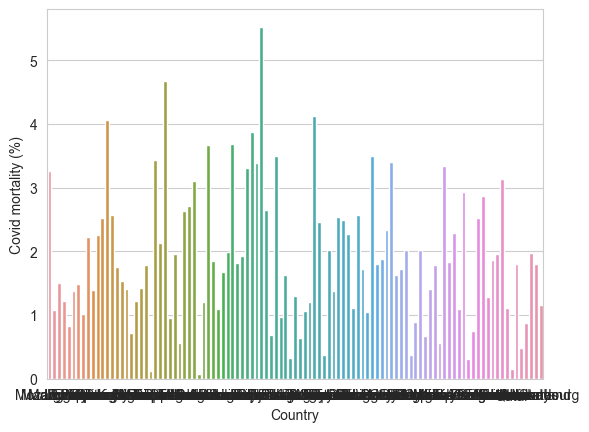

In [29]:
y_column='Covid mortality (%)'
plot_data=countries_stats
plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data

plot_data=plot_data.sort_values(by=['GDP/Capita'],ignore_index=True)
sns.barplot(data=plot_data,x='Country',y=y_column)

<Axes: xlabel='Country', ylabel='Covid cases per total population percentage (%)'>

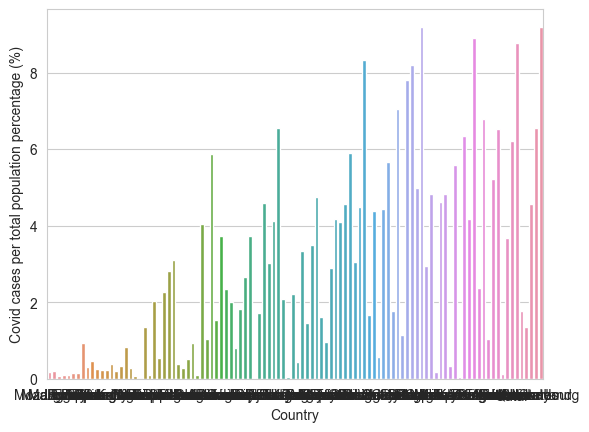

In [30]:
y_column='Covid cases per total population percentage (%)'
plot_data=countries_stats
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data

plot_data=plot_data.sort_values(by=['GDP/Capita'])
sns.barplot(data=plot_data,x='Country',y=y_column)

<Axes: xlabel='Country', ylabel='Total tests per total population percentage (%)'>

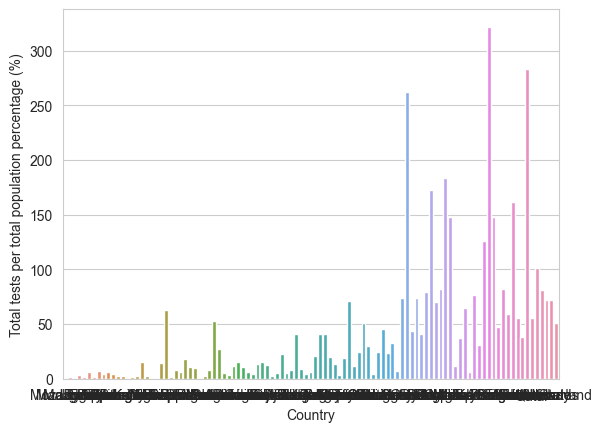

In [31]:
y_column='Total tests per total population percentage (%)'
plot_data=countries_stats
plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data

plot_data=plot_data.sort_values(by=['GDP/Capita'])
sns.barplot(data=plot_data,x='Country',y=y_column)

<Axes: xlabel='Country', ylabel='Covid mortality (%)'>

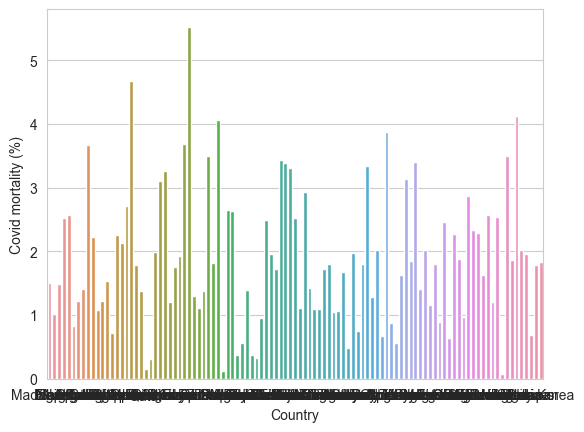

In [32]:
y_column='Covid mortality (%)'
plot_data=countries_stats
plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data

plot_data=plot_data.sort_values(by=['Hospital beds per 1000 people'])
sns.barplot(data=plot_data,x='Country',y=y_column)

<Axes: xlabel='Country', ylabel='Covid cases per total population percentage (%)'>

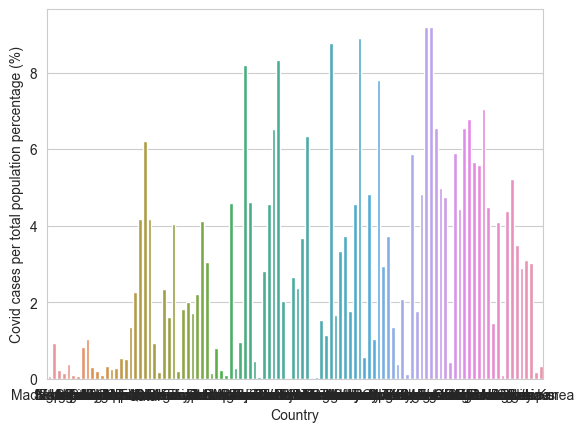

In [33]:
y_column='Covid cases per total population percentage (%)'
plot_data=countries_stats
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data

plot_data=plot_data.sort_values(by=['Hospital beds per 1000 people'])
sns.barplot(data=plot_data,x='Country',y=y_column)

<Axes: xlabel='Country', ylabel='Total deaths per total population percentage (%)'>

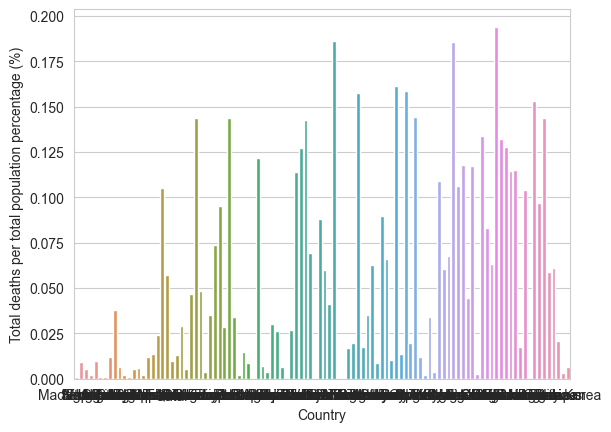

In [34]:
y_column='Total deaths per total population percentage (%)'
plot_data=countries_stats
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data

plot_data=plot_data.sort_values(by=['Hospital beds per 1000 people'])
sns.barplot(data=plot_data,x='Country',y=y_column)

<Axes: xlabel='Total tests per total population percentage (%)', ylabel='Covid cases per total population percentage (%)'>

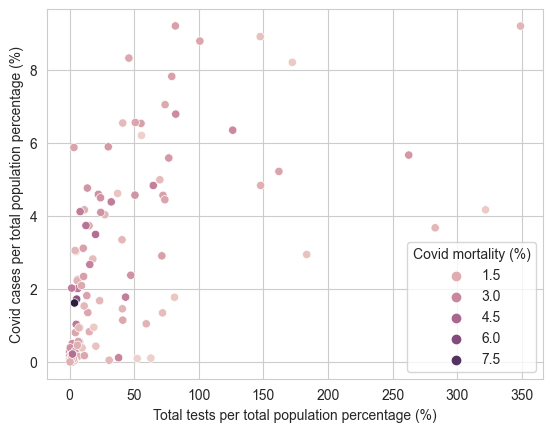

In [35]:
x_column='Total tests per total population percentage (%)'
y_column='Covid cases per total population percentage (%)'
plot_data=countries_stats
#plot_data=countries_stats.drop(plot_data[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,hue='Covid mortality (%)')

<Axes: xlabel='Covid positivity of test cases (%)', ylabel='Covid mortality (%)'>

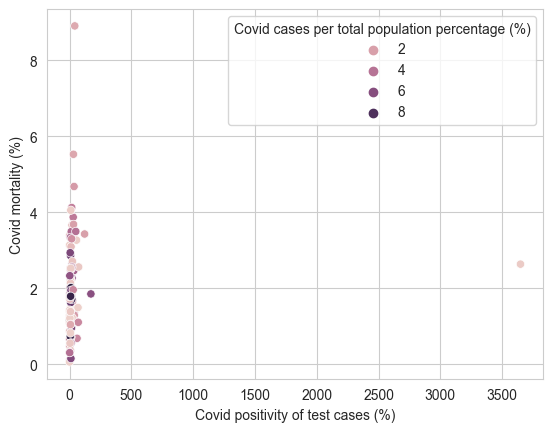

In [36]:
x_column='Covid positivity of test cases (%)'
y_column='Covid mortality (%)'
plot_data=countries_stats
#plot_data=countries_stats.drop(plot_data[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,hue='Covid cases per total population percentage (%)')

<Axes: xlabel='Median age', ylabel='Covid mortality (%)'>

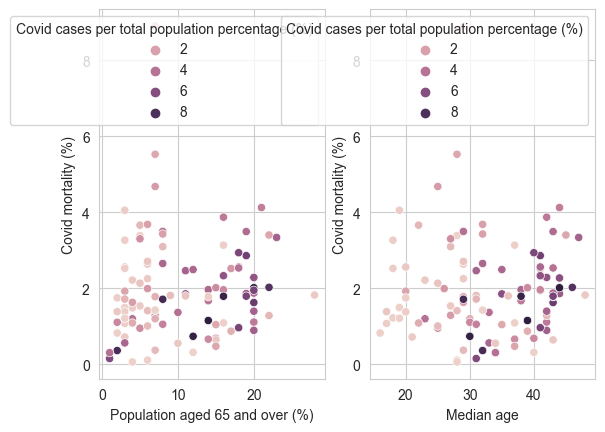

In [37]:
fig, axis =plt.subplots(1,2)
x_column='Population aged 65 and over (%)'
y_column='Covid mortality (%)'
plot_data=countries_stats
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)',ax=axis[0])

x_column='Median age'
y_column='Covid mortality (%)'
plot_data=countries_stats
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)',ax=axis[1])

<Axes: xlabel='Average temperature per year', ylabel='Covid mortality (%)'>

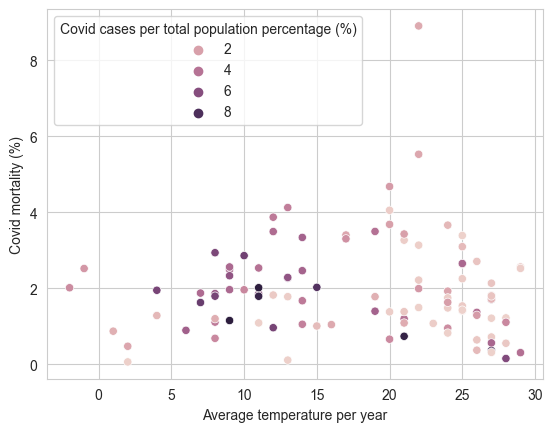

In [38]:
x_column='Average temperature per year'
y_column='Covid mortality (%)'
plot_data=countries_stats
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)')

<Axes: xlabel='Total tests per total population percentage (%)', ylabel='Covid mortality (%)'>

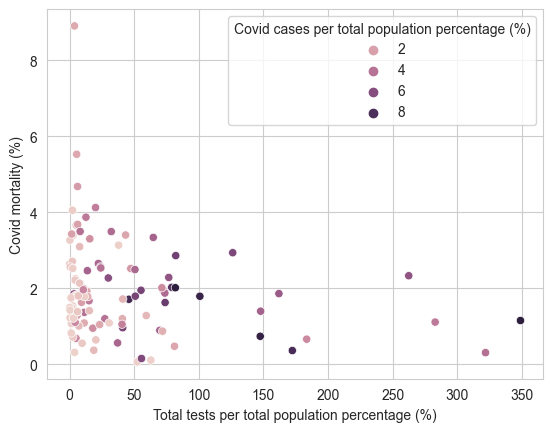

In [39]:
x_column='Total tests per total population percentage (%)'
y_column='Covid mortality (%)'
plot_data=countries_stats
#plot_data=plot_data.drop(plot_data[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='blue',hue='Covid cases per total population percentage (%)')

<Axes: xlabel='GDP/Capita', ylabel='Covid mortality (%)'>

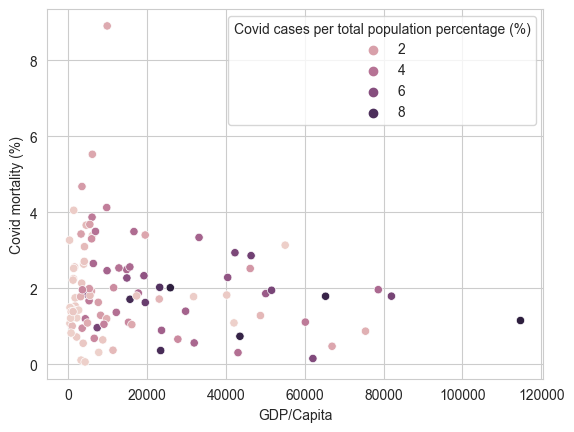

In [40]:
x_column='GDP/Capita'
y_column='Covid mortality (%)'
plot_data=countries_stats
#plot_data=plot_data.drop(plot_data[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)')

<Axes: xlabel='Population', ylabel='Covid mortality (%)'>

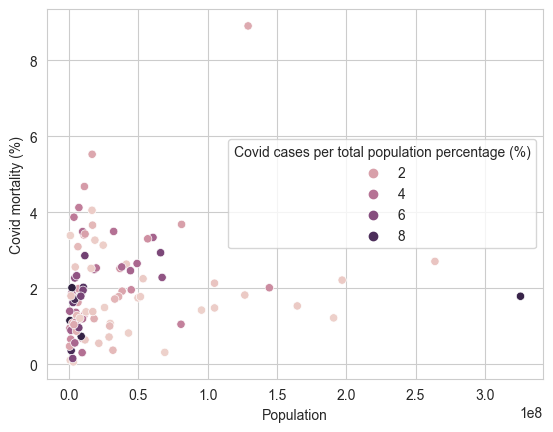

In [41]:
x_column='Population'
y_column='Covid mortality (%)'
plot_data=countries_stats
plot_data=plot_data.drop(plot_data[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)')

<Axes: xlabel='Medical doctors per 1000 people', ylabel='Covid mortality (%)'>

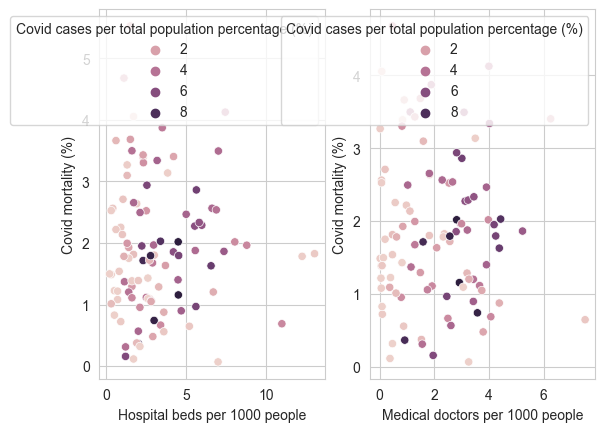

In [42]:
fig, axis =plt.subplots(1,2)
x_column='Hospital beds per 1000 people'
y_column='Covid mortality (%)'
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
plot_data=plot_data.drop(plot_data[y_column].idxmax())
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)',ax=axis[0])

x_column='Medical doctors per 1000 people'
y_column='Covid mortality (%)'
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
plot_data=plot_data.drop(plot_data[y_column].idxmax())
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)',ax=axis[1])

<Axes: xlabel='GDP/Capita', ylabel='Total deaths per total population percentage (%)'>

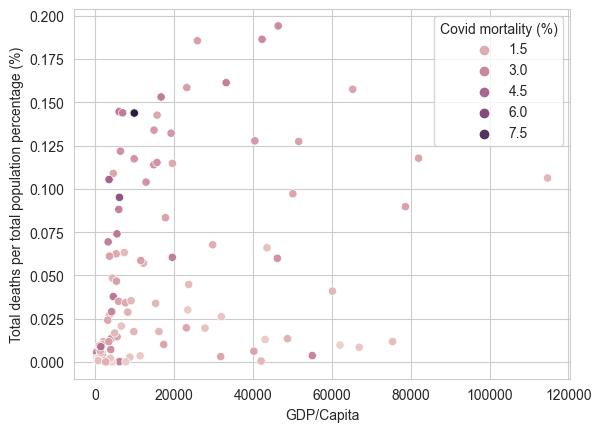

In [43]:
x_column='GDP/Capita'
y_column='Total deaths per total population percentage (%)'
plot_data=countries_stats
#plot_data=plot_data.drop(plot_data[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) 
sns.scatterplot(data=plot_data,x=x_column,y=y_column,hue='Covid mortality (%)')

In [44]:
countries_stats.sort_values(by=['Hospital beds per 1000 people'],ignore_index=True,ascending=False).head(105)

,Country,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests,Total cases,Total deaths,Total tests,Total deaths per total population percentage (%),Total tests per total population percentage (%),Covid cases per total population percentage (%),Covid positivity of test cases (%),Covid mortality (%)
0,Japan,Asia,36.20,138.25,12,13.05,2.37,40246.9,126785797,48,28,18880.0,432090.0,7889.0,7627688.0,0.006222,6.016201,0.340803,5.664757,1.825777
1,South Korea,Asia,35.91,127.77,13,12.27,2.33,31846.2,51466201,43,14,14574.0,90031.0,1605.0,5887719.0,0.003119,11.439972,0.174932,1.529132,1.782719
2,Belarus,Europe,53.71,27.95,8,11.00,4.07,6663.3,9507875,40,15,1292.0,287306.0,1976.0,474181.0,0.020783,4.987245,3.021769,60.589944,0.687768
3,Ukraine,Europe,48.38,31.17,10,8.80,3.00,3659.0,44831159,41,16,13103.0,1395528.0,27404.0,4756558.0,0.061127,10.609938,3.112853,29.339030,1.963701
4,Russia,Asia,61.52,105.32,-2,8.05,3.98,11585.0,144495044,39,15,261193.0,4198400.0,84700.0,103171283.0,0.058618,71.401261,2.905567,4.069349,2.017435
5,Bulgaria,Europe,42.73,25.49,13,7.45,4.00,9828.1,7075991,44,21,3973.0,247038.0,10191.0,1422194.0,0.144022,20.098867,3.491214,17.370204,4.125276
6,Austria,Europe,47.52,14.55,8,7.37,5.23,50137.7,8809212,44,19,38567.0,459440.0,8561.0,14269635.0,0.097182,161.985374,5.215449,3.219704,1.863355
7,Hungary,Europe,47.16,19.50,12,7.02,3.09,16731.8,9781127,43,19,8713.0,428599.0,14974.0,3154062.0,0.153091,32.246407,4.381898,13.588794,3.493709
8,Mongolia,Asia,46.86,103.85,2,7.00,3.26,4339.8,3075647,28,4,4521.0,2952.0,2.0,1609563.0,0.000065,52.332501,0.095980,0.183404,0.067751
9,Romania,Europe,45.94,24.97,11,6.89,2.67,12919.5,19586539,43,18,12824.0,801994.0,20350.0,4732128.0,0.103898,24.160103,4.094618,16.947851,2.537425


# Clustering

In [168]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import NearestNeighbors 
from sklearn.decomposition import PCA

from psynlig import pca_explained_variance_bar

In [208]:
numberOfclusters=7

kmeans = KMeans(n_clusters=numberOfclusters)

In [209]:

y = kmeans.fit_predict(countries_stats[['Covid cases per total population percentage (%)', 'Covid mortality (%)']])

C:\Users\Andreas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [210]:

countries_stats['Cluster'] = y

In [211]:
countries_stats_sorted.head(50)

,Country,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,...,Total cases,Total deaths,Total tests,Total deaths per total population percentage (%),Total tests per total population percentage (%),Covid cases per total population percentage (%),Covid positivity of test cases (%),Covid mortality (%),Cluster,Scale of success
28,Fiji,Oceania,-16.58,179.41,25,2.30,0.84,6175.9,905502,28,...,59.0,2.0,23998.0,0.000221,2.650243,0.006516,0.245854,3.389831,9,-2.817628
101,Vietnam,Asia,14.06,108.28,25,2.60,0.82,2715.3,95540800,32,...,2448.0,35.0,333691.0,0.000037,0.349265,0.002562,0.733613,1.429739,5,-2.787901
65,New Zealand,Oceania,-40.90,174.89,11,2.61,3.06,42084.4,4793900,37,...,2378.0,26.0,1469444.0,0.000542,30.652371,0.049605,0.161830,1.093356,7,-2.735085
90,Thailand,Asia,15.87,100.99,27,2.10,0.47,7806.7,69037513,40,...,26031.0,83.0,2681565.0,0.000120,3.884214,0.037706,0.970739,0.318851,2,-2.733674
53,Madagascar,Africa,-18.77,46.87,22,0.20,0.14,523.4,25570895,19,...,19831.0,297.0,28934.0,0.001161,0.113152,0.077553,68.538743,1.497655,5,-2.714088
66,Nigeria,Africa,9.08,8.68,28,0.50,0.40,2229.9,190886311,18,...,155657.0,1907.0,702055.0,0.000999,0.367787,0.081544,22.171625,1.225130,0,-2.705415
4,Australia,Oceania,-25.27,133.78,22,3.84,3.50,55060.3,24598933,37,...,28978.0,909.0,9336541.0,0.003695,37.955065,0.117802,0.310372,3.136862,6,-2.702012
91,Togo,Africa,8.62,0.82,27,0.70,0.05,679.3,7797694,19,...,6901.0,84.0,233786.0,0.001077,2.998143,0.088501,2.951845,1.217215,1,-2.698324
95,Uganda,Africa,1.37,32.29,24,0.50,0.09,794.3,42862958,16,...,40357.0,334.0,544668.0,0.000779,1.270720,0.094154,7.409468,0.827614,9,-2.685977
59,Mongolia,Asia,46.86,103.85,2,7.00,3.26,4339.8,3075647,28,...,2952.0,2.0,1609563.0,0.000065,52.332501,0.095980,0.183404,0.067751,2,-2.671094


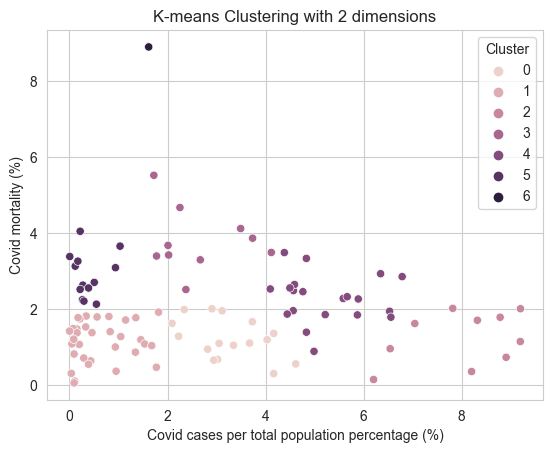

In [212]:

sns.scatterplot(x="Covid cases per total population percentage (%)", y="Covid mortality (%)", hue=countries_stats['Cluster'], data=countries_stats)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [213]:
for i in range(numberOfclusters):
    print('Those countries are contained in cluster ',i)
    print(countries_stats[countries_stats['Cluster']==i])

Those countries are contained in cluster  0
                 Country      Continent  Latitude  Longitude  \
0                Albania         Europe     41.15      20.17   
8                Belarus         Europe     53.71      27.95   
15            Cape Verde         Africa     16.00     -24.01   
18            Costa Rica  North America      9.75     -83.75   
21                Cyprus         Europe     35.13      33.43   
22               Denmark         Europe     56.26       9.50   
23    Dominican Republic  North America     18.74     -70.16   
45                Jordan           Asia     30.59      36.24   
48                Kuwait           Asia     29.31      47.48   
50                 Libya         Africa     26.34      17.23   
68                  Oman           Asia     21.51      55.92   
71              Paraguay  South America    -23.44     -58.44   
78                Russia           Asia     61.52     105.32   
94                Turkey           Asia     38.96      35.24

In [53]:
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours